In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [27]:
df_path = "/Users/tomii/tmp/AnalysisResult/pv_stim_pandas.csv"

In [28]:
df = pd.read_csv(df_path)

In [33]:
df

,sample,session,frame_start,frame_end,roi_top,roi_bottom,roi_left,roi_right,stim_x,stim_y,pre_x,pre_y,pst_x,pst_y,core_id_min,core_id_max,fb_angle,stim_phase,speed
0,20140911-2,8,322,342,0,128,60,128,78,60,75,65,68,60,6,6,1.049658,1.235260,900
1,20140911-2,14,306,328,30,128,0,128,78,60,82,51,74,35,14,14,1.049658,0.633302,900
2,20140911-2,15,282,312,0,128,0,128,78,60,83,74,84,67,2,2,1.049658,0.782603,900
3,20140911-2,17,282,312,0,128,0,128,78,60,87,68,84,55,6,6,1.049658,-0.429301,900
4,20140911-2,34,302,315,70,128,0,128,78,60,68,75,69,73,7,7,1.049658,0.980198,900
5,20140911-2,35,302,337,0,128,0,128,78,60,72,74,53,40,12,12,1.049658,1.085959,900
6,20140911-2,36,282,312,0,128,0,128,78,60,85,74,87,61,5,5,1.049658,-0.466451,900
7,20140911-2,38,302,332,0,128,0,128,78,60,75,47,71,32,13,13,1.049658,0.419959,900
8,20160907-3,6,300,313,69,128,0,128,86,68,108,83,106,69,9,9,1.555173,-1.004775,1300
9,20160907-3,10,360,376,0,128,0,80,86,68,60,69,71,91,5,10,1.555173,2.607067,1300


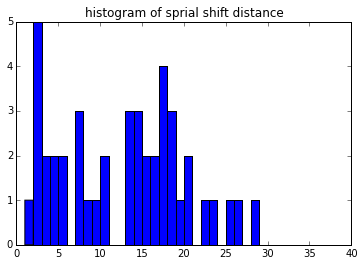

14.092216088


In [30]:
data = np.zeros([len(df), 4])

def phase_comp(p):
    return math.atan2(np.absolute(np.sin(p)), np.absolute(np.cos(p)))

for i in range(len(df)):
    s = df.loc[i,:]    

    theta_1 = s.stim_phase
    
    vec_pre = (s.stim_x - s.pre_x) + 1j*(s.stim_y - s.pre_y)
    theta_2 = phase_comp(np.angle(vec_pre) - s.fb_angle)
    l = np.abs(vec_pre) * 1000 / s.speed
    
    shift = np.abs(((s.pst_x - s.pre_x) + 1j*(s.pst_y - s.pre_y))) * 1000 / s.speed
    
    d = np.array([theta_1, theta_2, l, shift])
    data[i,:] = d
    #print i, s.sample, s.session, d

plt.hist(data[:,3], np.arange(1,40,1))
plt.title("histogram of sprial shift distance")
plt.show()
print np.mean(data[:,3])

In [31]:
shift_thre = 20
step_t1 = 8
step_t2 = 8
step_l = 8

data_num = np.zeros((step_t1, step_t2, step_l))
data_suc = np.zeros((step_t1, step_t2, step_l))

success =(data[:,3] > shift_thre) * 1.0
theta_1 = ( ( data[:,0]+np.pi) / ( np.pi / (step_t1/2) ) ).astype(np.int8)
theta_2 = (data[:,1] / ( np.pi / (2*step_t2) ) ).astype(np.int8)
l = (data[:,2] / ((np.max(data[:,2])+1)/step_l)).astype(np.int8)
for n , s in enumerate(success):
    i = theta_1[n]
    j = theta_2[n]
    k = l[n]
    
    data_num[i, j, k] += 1
    if s > 0: data_suc[i, j, k] += 1

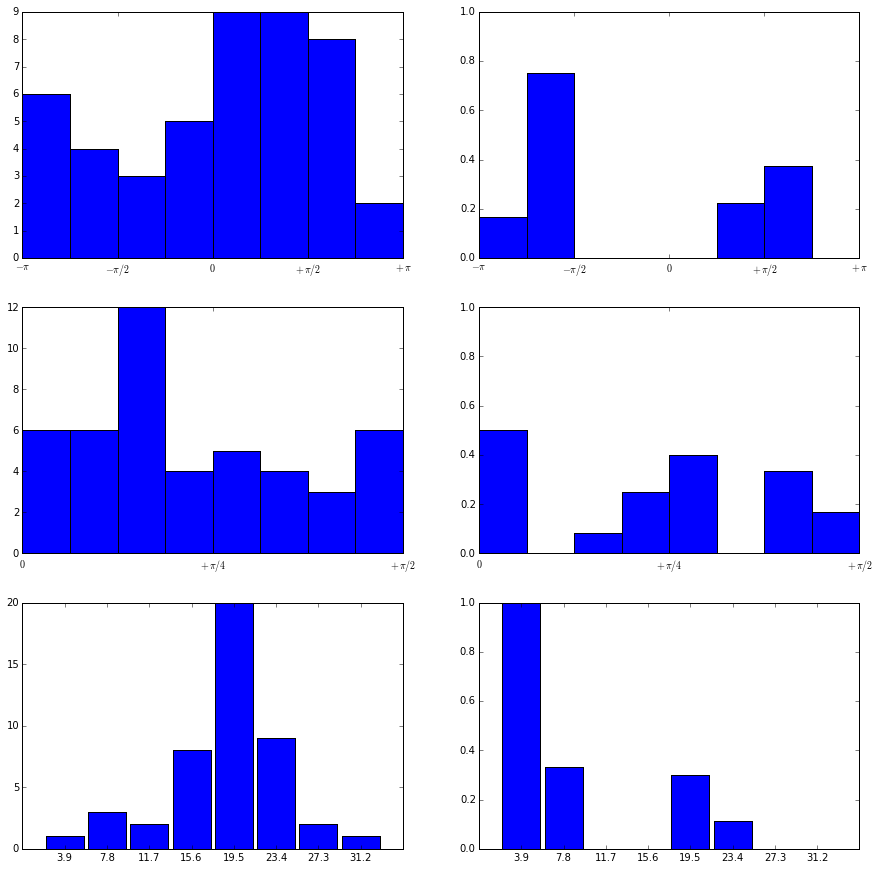

In [32]:
plt.figure(figsize=(15,15))

num = np.sum(data_num, axis=(1,2))
suc = np.sum(data_suc, axis=(1,2))
plt.subplot(3,2,1)
plt.bar(np.arange(-np.pi, np.pi, 2.*np.pi/step_t1), num, width=2.*np.pi/step_t1)
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
#plt.xlabel(r"$\theta_{1}$ [rad]")
plt.subplot(3,2,2)
plt.bar(np.arange(-np.pi, np.pi, 2.*np.pi/step_t1), (suc/(num+((num==0)*1))), width=2.*np.pi/step_t1)
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim([0,1])
#plt.xlabel(r"$\theta_{1}$ [rad]")

num = np.sum(data_num, axis=(0,2))
suc = np.sum(data_suc, axis=(0,2))
plt.subplot(3,2,3)
plt.bar(np.arange(0, .5*np.pi, .5*np.pi/step_t2), num, width=.5*np.pi/step_t2)
plt.xlim([0, .5*np.pi])
plt.xticks([0, np.pi/4, np.pi/2],
          [r'$0$', r'$+\pi/4$', r'$+\pi/2$'])
#plt.xlabel(r"$\theta_{2}$ [rad]")
plt.subplot(3,2,4)
plt.bar(np.arange(0, .5*np.pi, .5*np.pi/step_t2), (suc/(num+((num==0)*1))), width=.5*np.pi/step_t2)
plt.xlim([0, .5*np.pi])
plt.xticks([0, np.pi/4, np.pi/2],
          [r'$0$', r'$+\pi/4$', r'$+\pi/2$'])
#plt.xlabel(r"$\theta_{2}$ [rad]")
plt.ylim([0,1])


num = np.sum(data_num, axis=(0,1))
suc = np.sum(data_suc, axis=(0,1))
ticks = [r'{0:.1f}'.format(v) for v in (np.arange(8)+1)*((np.max(data[:,2])+1)/step_l) ]
plt.subplot(3,2,5)
plt.bar(np.arange(step_l), num, width=0.9, align='center')
plt.xticks(np.arange(8), ticks)
plt.subplot(3,2,6)
plt.bar(np.arange(step_l), (suc/(num+((num==0)*1))), width=0.9, align='center')
plt.ylim([0,1])
plt.xticks(np.arange(8), ticks)
plt.show()
